In [32]:
import sys
import platform
from os.path import join, exists, abspath, dirname
from os import getcwd, makedirs
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm
from matplotlib import colors as mcolor
import scipy
from scipy.stats import ttest_1samp, pearsonr
# from scipy.io import loadmat
from sklearn.metrics import r2_score
import seaborn as sns

from tqdm import tqdm

In [3]:
import nibabel as nb
from nilearn import plotting, image

In [4]:
dir_current = getcwd().replace('\\','/')

tmp = dir_current.split('/')
idx = [ii for ii, s in enumerate(tmp) if s=='github'][0]

dir_git = '/'.join(tmp[:idx+1])
dir_git

'/home/sungbeenpark/github'

---

In [7]:
dir_gp = join(dir_git,'GloveProject_TMS')
dir_atlas = join(dir_gp,'atlas')

---

## Harvard-Oxford atlas (test mask)

In [75]:
fname = join(dir_atlas, 'mask.HO_putamen+HO_caudate-y=0.thr50-1mm.nii')
mask = nb.load(fname)

4


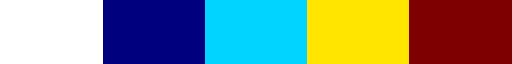

In [76]:
N = len(np.unique(mask.get_fdata())) - 1
print(N)
colors = [cm.jet(i) for i in np.linspace(0, 1, N)]
colors = [(1,1,1,1), *colors]
cmap = mcolor.ListedColormap(colors, name='jet_white')
cmap

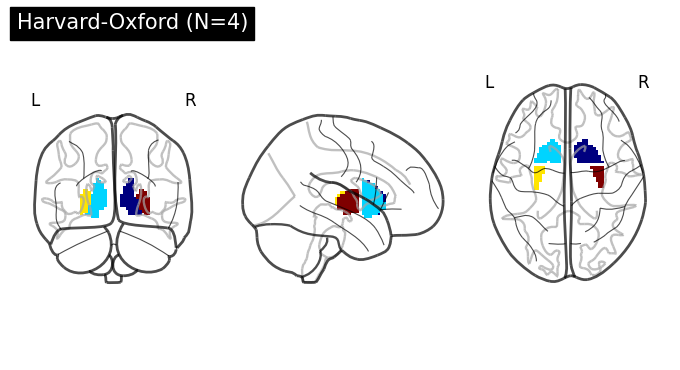

In [77]:
plotting.plot_glass_brain(
    stat_map_img=mask,
    cmap=cmap, symmetric_cbar=False, colorbar=False,
    resampling_interpolation='nearest',
    title='Harvard-Oxford (N=%d)'%N
)

---

## TTatlas (final mask)

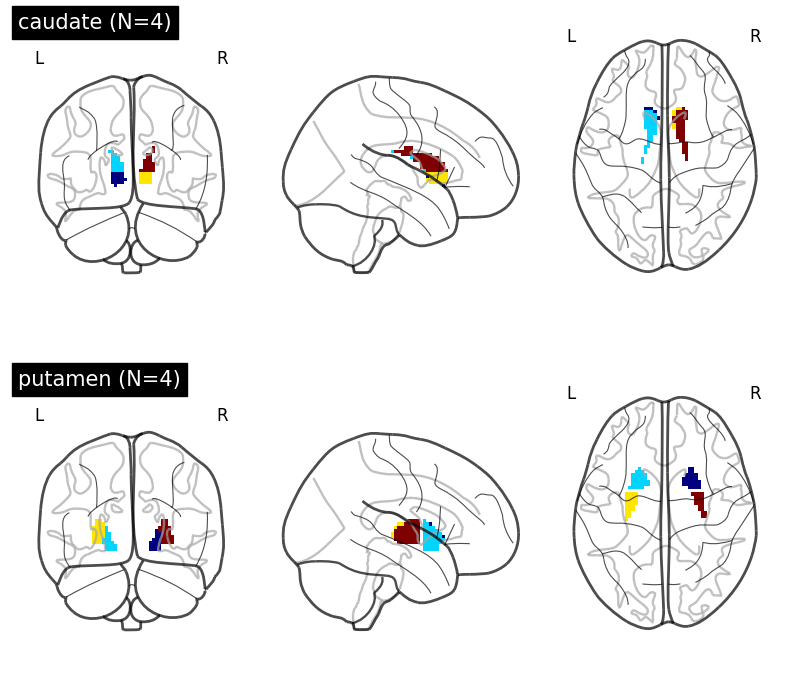

In [73]:
fig, axs = plt.subplots(nrows=2, figsize=(10,8.5))

for ii, roi in enumerate(['caudate','putamen']):
    ax = axs[ii]
    fname = join(dir_atlas,'mask.TTatlas.%s.resampled.nii'%roi)
    mask = nb.load(fname)
    
    N = len(np.unique(mask.get_fdata())) - 1
    colors = [cm.jet(i) for i in np.linspace(0, 1, N)]
    colors = [(1,1,1,1), *colors]
    cmap = mcolor.ListedColormap(colors, name='jet_white')
    
    plotting.plot_glass_brain(
        stat_map_img=mask,
        cmap=cmap, symmetric_cbar=False, colorbar=False,
        resampling_interpolation='nearest',
        title='%s (N=%d)'%(roi,N),
        axes=ax
    )

---